In [1]:
from main_extractor import *
from utils.text_feature import *
from utils.dict_lib import *

fs = [TextFeature("rank", "mean_key"), TextFeature("words", "select_keys_proportion", args=("я", "ты")), 
      TextFeature("parts", "select_keys_proportion", args=("VERB",)), TextFeature("len_words", "mean_key", args=(16,))]

d = text2fеatures("1813\\3", fs)
print(d)

d = important_feature("words", n_top=30, rang=(2, 5))
print(d)
print(len(d))

d = important_feature("n_grams_letter", n_top=40, rang=(3, 5))
print(d)
print(count_features(fs))

[0.1004481418852913, 0.03561643835616438, 0.03561643835616438, 0.18904109589041096, 0.292722602739726]
{'друг': 4, 'о': 4, 'любовь': 3, 'вы': 5, 'всё': 2, 'рука': 2, 'весь': 5, 'а': 5, 'где': 4, 'душа': 3, 'день': 2, 'от': 2, 'они': 5, 'его': 2, 'то': 5, 'да': 2, 'так': 3, 'кто': 2, 'нет': 2, 'тот': 2}
20
{'нны': 4, 'дру': 5, 'рас': 4, 'лен': 4, 'руг': 4, 'ель': 3, 'люб': 4, 'вет': 4, 'тра': 3, 'под': 5, 'что': 5, 'нас': 3, 'нов': 5, 'нье': 4, 'его': 5, 'льн': 3, 'как': 5, 'сво': 3, 'раз': 4, 'ово': 5, 'мен': 3, 'одн': 3, 'она': 4}
5


In [1]:
from models.data import *
from periods import *

fs = [TextFeature("len_words", "mean_key", args=(16,)), TextFeature("homogeneity", "mean_key", args=(100,)), TextFeature("rank", "mean_key"), 
      TextFeature("words", "select_keys_proportion", args=("любовь", "что", "друг", "они")), 
      TextFeature("parts", "select_keys_proportion", args=("PRON", "ADP", "ADV")), 
      TextFeature("rels", "select_keys_proportion", args=("advmod", "conj", "amod")),
      TextFeature("n_grams_letter", "select_keys_proportion", args=("ной", "енн", "ень", "его", "как")),
      TextFeature("n_grams_word", "select_keys_proportion", args=("что же",))]

per1 = sum(periods[:3], [])
per2 = sum(periods[3:], [])
pers = [per1, per2]

data = get_data(pers, fs, [0, 1], train_part=0.8, val_part=0.1)


Epoch 1/50
20/20 [==============================] - 1s 15ms/step - loss: 0.6895 - acc: 0.5550 - val_loss: 0.6874 - val_acc: 0.5584
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 0.6862 - acc: 0.5550 - val_loss: 0.6843 - val_acc: 0.5584
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 0.6842 - acc: 0.5550 - val_loss: 0.6827 - val_acc: 0.5584
Epoch 4/50
20/20 [==============================] - 0s 4ms/step - loss: 0.6829 - acc: 0.5550 - val_loss: 0.6814 - val_acc: 0.5584
Epoch 5/50
20/20 [==============================] - 0s 4ms/step - loss: 0.6819 - acc: 0.5550 - val_loss: 0.6804 - val_acc: 0.5584
Epoch 6/50
20/20 [==============================] - 0s 4ms/step - loss: 0.6809 - acc: 0.5550 - val_loss: 0.6794 - val_acc: 0.5584
Epoch 7/50
20/20 [==============================] - 0s 4ms/step - loss: 0.6801 - acc: 0.5550 - val_loss: 0.6786 - val_acc: 0.5584
Epoch 8/50
20/20 [==============================] - 0s 4ms/step - loss: 0.6789 - acc: 0.5

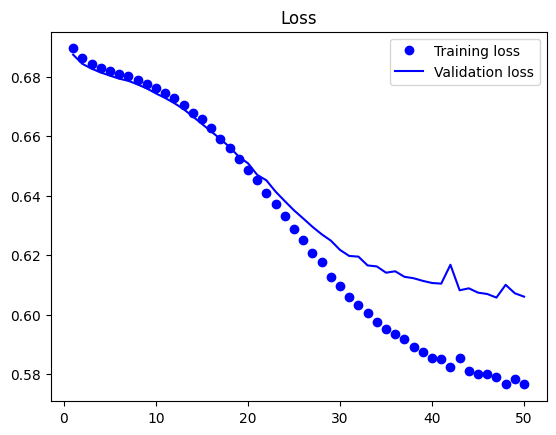

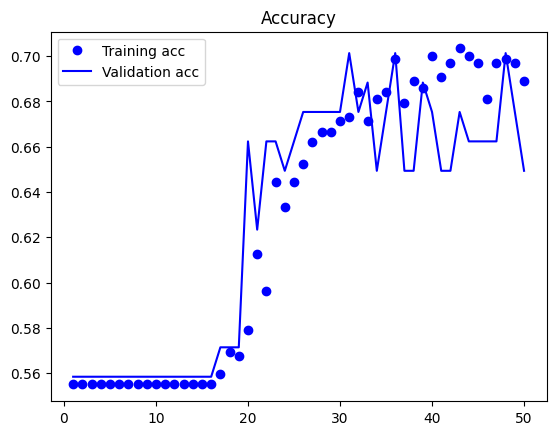

In [2]:
from models.fit import fit
from models.models import get_model1
from utils.text_feature import count_features

epochs = 50
model = get_model1(count_features(fs))
fit(model, data, epochs)

In [3]:
from models.data import *

data.save('data1')
d = load_data('data1')
